# Описание проекта

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

План:<br>
1) Изучение данных<br>
2) Подготовка данных<br>
3) Исследовательский анализ данных<br>
4) Составление портрета пользователя каждого региона<br>
5) Проверка гипотез<br>

Задачи:<br>
1) Заменить названия столбцов (приведите к нижнему регистру);<br>
2) Преобразовать данные в нужные типы. <br>
3) Обработайте пропуски при необходимости:<br>
4) Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.<br>
5) Сколько игр выпускалось в разные годы. <br>
6) Как менялись продажи по платформам.<br>
7) Какие платформы лидируют по продажам, растут или падают? <br>
8) Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.<br>
9) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.<br>
10) Соотнесите выводы с продажами игр на других платформах.<br>
11) Посмотрите на общее распределение игр по жанрам.<br>
12) Самые популярные платформы (топ-5). Опишите различия в долях продаж.<br>
13) Самые популярные жанры (топ-5). Поясните разницу.<br>
14) Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br>
15) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
16) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas
import pandas as pd

In [2]:
from scipy import stats as st

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import scipy.stats as stats

In [7]:
import numpy as np

In [8]:
# чтение файла с данными и сохранение
data = pd.read_csv('/datasets/games.csv')

In [9]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия колонок в верхнем регистре, нужно переделать в нижний

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что есть пропуски ещё и в столбце Year_of_release, и его тип данных float, а не int, т.к. в нем указаны года, а они целочисленные. User_score имеет неверный тип данных object, а должен иметь float, т.к. в нём численные значения. Critic_score имеет неверный тип данных float, а должен иметь int, т.к. в нём целые численные значения. Видим пропуски в столбцах critic_score, user_score, rating, name, year_of_release, genre

In [11]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Подготовка данных

In [13]:
#Приведение столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [14]:
#Приведение значений с столбцах к нижнему регистру
for column in ['name', 'platform', 'genre', 'rating']:
    data[column] = data[column].str.lower()

In [15]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
#Посчитаем количество пустых значений
data.isna().sum()
display(pd.DataFrame(round((data.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
name,0.01
platform,0.00
year_of_release,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


In [17]:
#Рассмотрим данные, где пропуск в столбце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что если нет названия игры, нет жанра и нет оценок. Эти две строки можно удалить, в них слишком мало данных, это не повляет на результаты исследования

In [18]:
data = data[data['name'].notna()]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [20]:
data['year_of_release'].isna().sum()

269

In [21]:
#Напишем цикл где будем делать замену на года тех у кого совпадает название с игрой но в графе year_of_release пусто
for i in data[data['year_of_release'].isna()].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [22]:
 data['year_of_release'].isna().sum()

146

In [23]:
#Посмотрим значения в столбце user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура tbd значит to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому предлагаю заменить tbd на Nan

In [24]:
#Заменим tbd на Nan
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [25]:
#Преобразуем типы данных
data['user_score'] = data['user_score'].astype('float32')
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int64(1), float32(1), float64(5), object(4)
memory usage: 2.0+ MB


In [27]:
#Посчитаем количество дубликатов
data.duplicated().sum()

0

In [28]:
#Создадим новый столбец total_sales и прибавим продажи всех столбцов
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Столбцы приведены к правильному типу, много пропусков в столбцах critic_score, user_score, rating, посчитаны продажи для каждой игры по всем регионам

## Исследовательский анализ данных

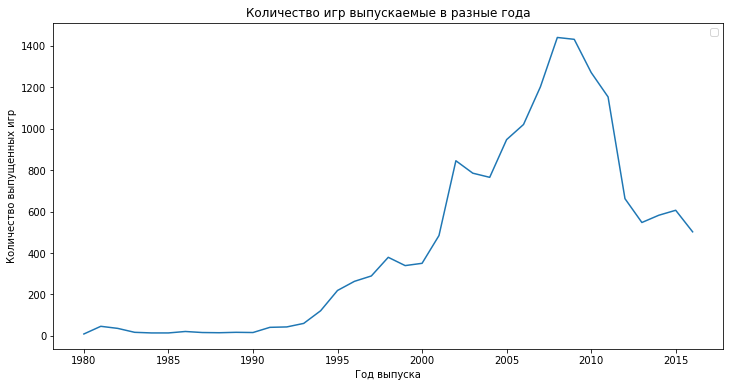

In [30]:
#Посмотрим, сколько игр выпускалось в разные годы
games_on_period = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

Данные с 1980 по 1990 не важны, т.к. они идут по прямой. 
- Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 
- С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.

Text(0, 0.5, 'Количество продаж')

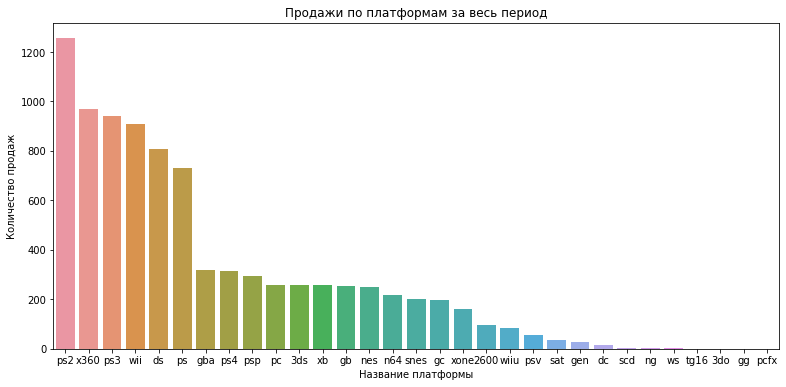

In [31]:
games_on_period = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', 
                                                                                                        ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(data = games_on_period, x= games_on_period.index, y= games_on_period['total_sales']);
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS

In [32]:
#Функция для таблиц с топовыми платформами
def top_plat(tbl):
    global top_platforms
    global top_sales
    top_platforms = tbl.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', 
                                                                                                        ascending = False).head(6).reset_index()
    
    top_sales = tbl[tbl['platform'].isin(top_platforms['platform'])].pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
    
    plt.figure(figsize=(12,6))
    plt.title('Количество продаж популярных игровых платформ')
    plt.xlabel('Годы игровых релизов')
    plt.ylabel('Продажи')
    sns.lineplot(data= top_sales)
    plt.legend()
    plt.show()

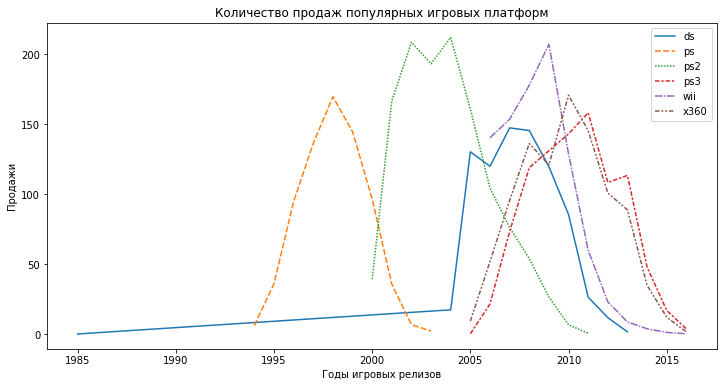

In [33]:
top_plat(data)

In [34]:
#Топовые платформы по продажам
top_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86


In [35]:
#Продажи каждой топовой платформы по годам
top_sales

platform,ds,ps,ps2,ps3,wii,x360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


У платформы DS необычно идёт график, рассмотрим эту платформу

In [36]:
data[data['platform']=='DS'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Видим, что платформа появилась в 2004, а строка с 1985 - ошибка

In [37]:
data = data.drop(labels = [15957], axis = 0)

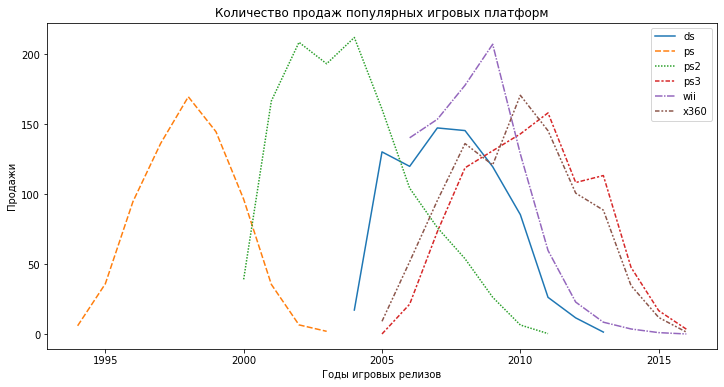

In [38]:
top_plat(data)

- Самый долгожитель - платформа ds
- Практически все игровые платформы в среднем существуют по 10 лет. 
- Cамые продаваемые это Sony Play Station и XBOX 
- Самый пик наступает примерно через 5 лет после выхода приставки
- у Nintento WII был быстрый скачок в 2009 году и такой же резкий провал

Т.к. пик продаж платформы наступает, примерно, через 5 лет после её выхода, то потенциально прибыльные платформы будут те платформы, которые вышли с 2011 года

In [39]:
#Возьмём данные за актуальный период
df = data[data['year_of_release'] > 2010]

In [40]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,m,14.73
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


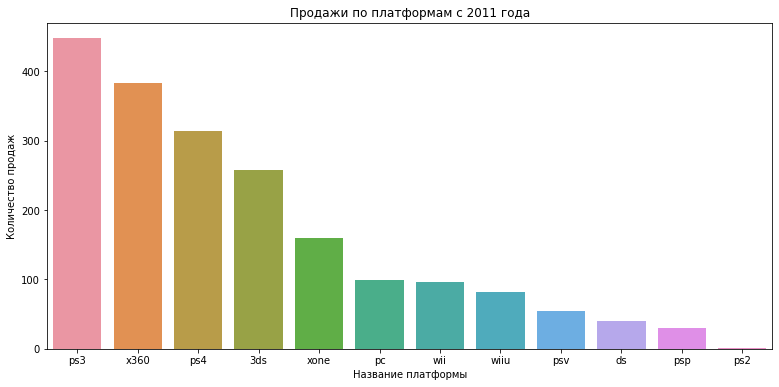

In [41]:
df_on_period = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', 
                                                                                                        ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(data = df_on_period, x= df_on_period.index, y= df_on_period['total_sales'])
plt.title("Продажи по платформам с 2011 года")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

По продажам лидируют ps3, x360, ps4, 3ds, xone

In [42]:
#Создадим таблицу распределения продаж игр на платформы по годам
top_sale = df.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
top_sale

platform,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,,
2011,63.20,26.33,35.16,0.45,157.98,NaN,17.82,4.63,59.79,NaN,145.23,NaN
2012,51.76,11.67,23.45,NaN,108.28,NaN,7.95,16.19,22.94,17.56,100.72,NaN
2013,56.57,1.54,12.66,NaN,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.63,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


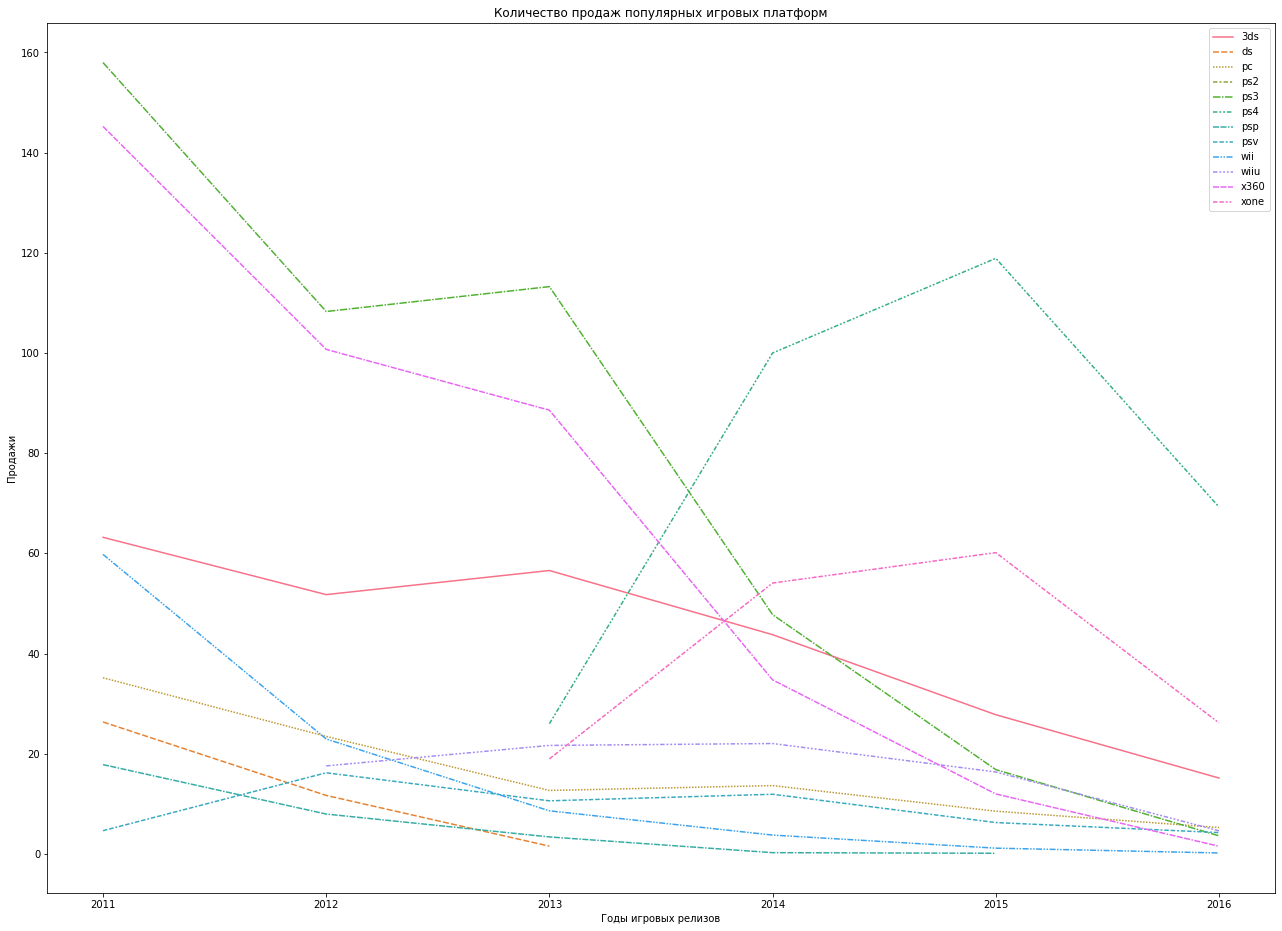

In [43]:
plt.figure(figsize=(22,16))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')
sns.lineplot(data= top_sale)
plt.legend()
plt.show()

Количество продаж по всем платформам падает к 2016 году. 

Выделим потенциально прибыльные платформы: 'ps4','xone','pc','wiiu','3ds', 'psv'

In [44]:
#Сохраним в переменной list_of_top_6 только последние поколения платформ
list_of_top_6 = ['ps4','xone','pc','wiiu','3ds', 'psv']
top_6 = df[df['platform'].isin(['ps4','xone','pc','wiiu','3ds', 'psv'])]

In [45]:
top_6.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,1093.000000,1167.000000,2124.000000
mean,2013.911017,0.172006,0.164652,0.071455,0.046850,72.007319,6.736675,0.454962
std,1.679471,0.466834,0.458286,0.278213,0.133442,12.387883,1.493413,1.136662
min,2011.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.400000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,65.000000,5.900000,0.040000
50%,2014.000000,0.020000,0.030000,0.000000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.130000,0.130000,0.050000,0.030000,81.000000,7.800000,0.360000
max,2016.000000,6.030000,6.310000,4.390000,2.380000,97.000000,9.300000,14.630000


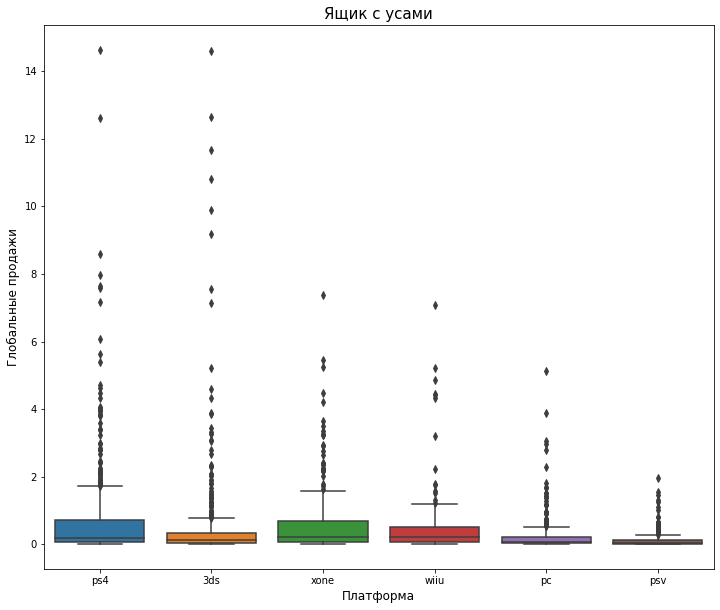

In [46]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,10))
sns.boxplot(data=top_6, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

Видно, что график неинформативен и присутствует много выбросов - значения, которые находятся очень далеко от статистически значимой части данных

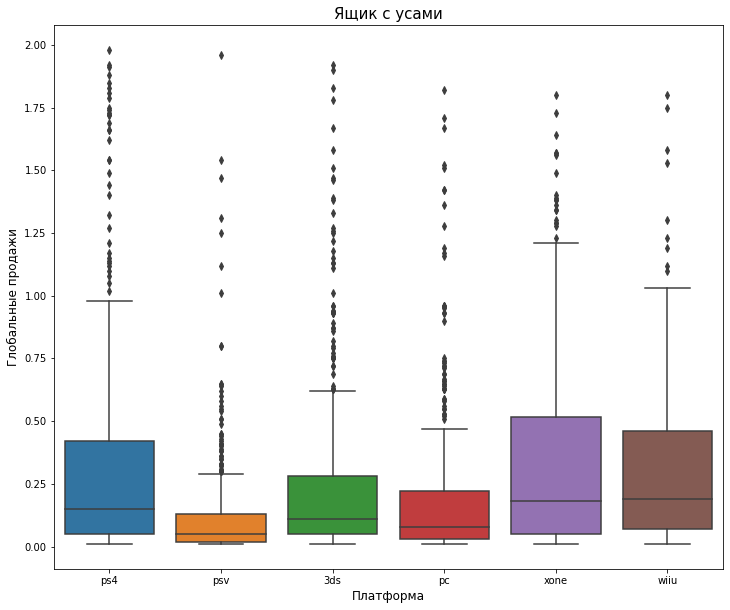

In [47]:
#Ограничим данные от выбросов
top_6 = top_6[top_6['total_sales'] < 2]
plt.figure(figsize=(12,10))
sns.boxplot(data=top_6, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

- Исходя из графиков видно, что медиана протекает у всех по разному.
- Больше всех продаж у xone, затем wiiu, после PS4, 3DS, PC и PSV на последнем месте.
- Успех xone можно попробовать объяснить тем, что она вышла недавно, самая молодая платформа.


In [48]:
#Выделим одну популярную платформу
xone = df[df['platform'] == 'xone']

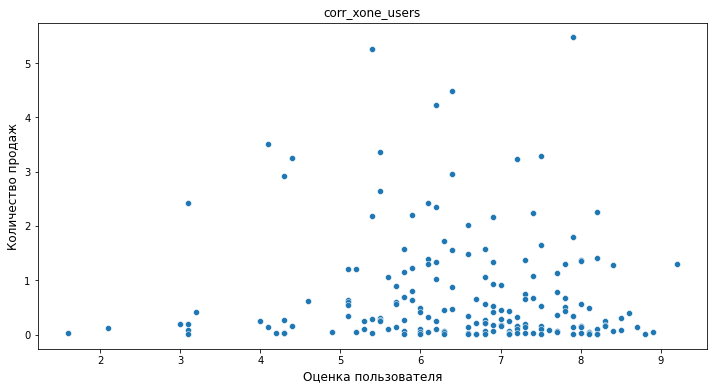

In [49]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=xone)
plt.title('corr_xone_users')
plt.xlabel('Оценка пользователя', fontsize=12)
plt.ylabel('Количество продаж',fontsize=12)
plt.show()

In [50]:
#Корреляция между оценками пользователей и продажами 
xone['user_score'].corr(xone['total_sales'])

-0.06892505319711206

Для xone корреляции между оценками пользователей и продажами почти нет 

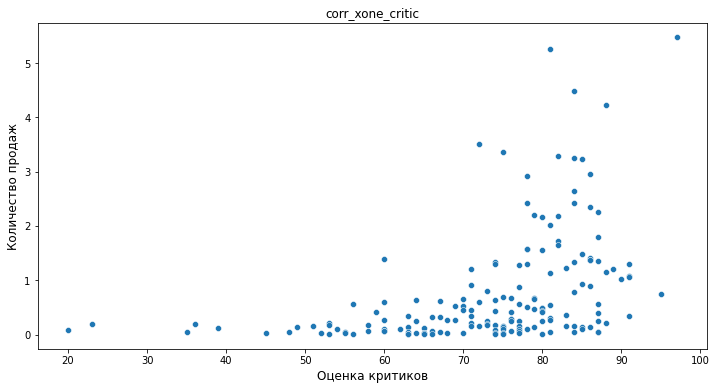

In [51]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone)
plt.title('corr_xone_critic')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Количество продаж',fontsize=12)
plt.show()

In [52]:
#Корреляция между оценками пользователей и продажами 
xone['critic_score'].corr(xone['total_sales'])

0.4169983280084017

Для xone корреляция между оценками пользователей и продажами: чем выше оценка критиков, тем больше продаж

In [53]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = df[df['platform'] == name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if -0.4 <= critic_correl <= 0.4:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Корреляция не выявлена', critic_correl)
    if  0.4 < critic_correl <= 0.7:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Слабая', critic_correl)
    if  critic_correl > 0.7:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Сильная', critic_correl)
    if -0.4 > critic_correl >= -0.7:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Слабая', critic_correl)
    if -0.7 > critic_correl:
        print('Корреляция между отзывами критиков и продажами для платформы ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if -0.4 <= correl <= 0.4:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Корреляция не выявлена', correl)
    if  0.4 < correl <= 0.7:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Слабая', correl)
    if  correl > 0.7:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Сильная', correl)
    if -0.4 > correl >= -0.7:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Слабая', correl)
    if -0.7 > correl:
        print('Корреляция между отзывами пользователей и игровой платформой ', name_of_platform.upper(), ': Сильная', correl)
    
    print('\n')

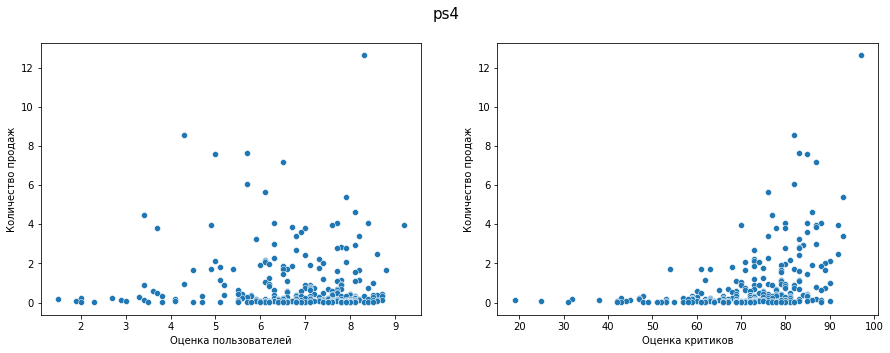

Корреляция между отзывами критиков и продажами для платформы  PS4 : Слабая 0.40656790206178095
Корреляция между отзывами пользователей и игровой платформой  PS4 : Корреляция не выявлена -0.031957109005188264




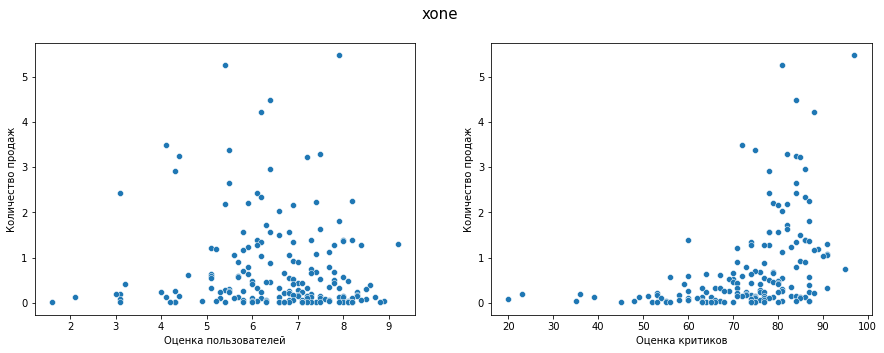

Корреляция между отзывами критиков и продажами для платформы  XONE : Слабая 0.4169983280084017
Корреляция между отзывами пользователей и игровой платформой  XONE : Корреляция не выявлена -0.06892505319711206




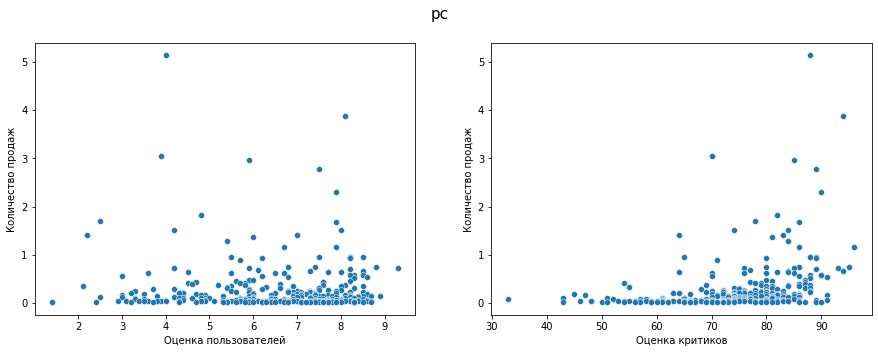

Корреляция между отзывами критиков и продажами для платформы  PC : Корреляция не выявлена 0.31552529004617036
Корреляция между отзывами пользователей и игровой платформой  PC : Корреляция не выявлена -0.04890890908110983




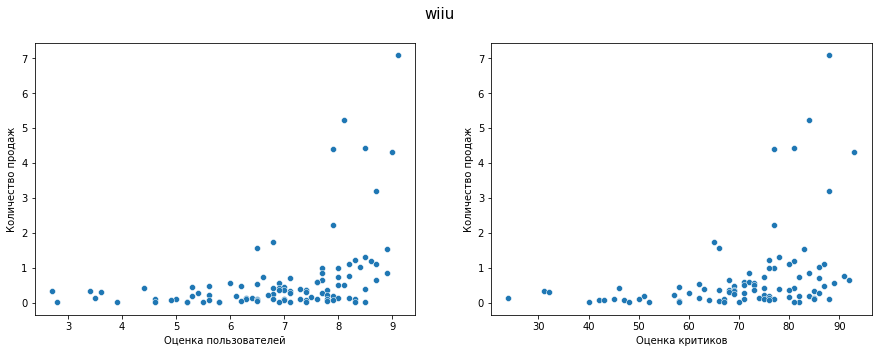

Корреляция между отзывами критиков и продажами для платформы  WIIU : Корреляция не выявлена 0.34837976012017485
Корреляция между отзывами пользователей и игровой платформой  WIIU : Слабая 0.4002190377710612




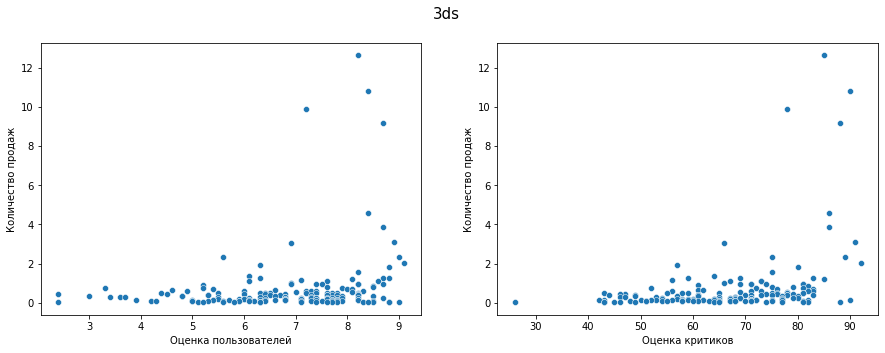

Корреляция между отзывами критиков и продажами для платформы  3DS : Корреляция не выявлена 0.34821555174929825
Корреляция между отзывами пользователей и игровой платформой  3DS : Корреляция не выявлена 0.22230508954725858




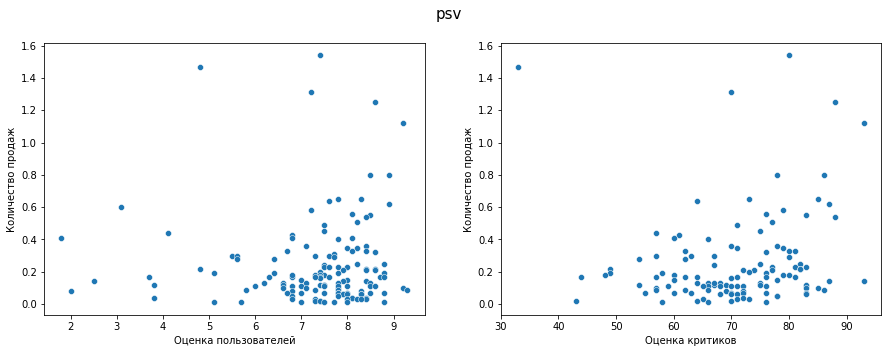

Корреляция между отзывами критиков и продажами для платформы  PSV : Корреляция не выявлена 0.13176292727608935
Корреляция между отзывами пользователей и игровой платформой  PSV : Корреляция не выявлена 0.013488745501085342




In [54]:
for i in list_of_top_6:
    other_platform_matrix(i)

У PS4, Xbox One, WiiU, 3DS наблюдается пусть и не сильная, но всё же, связь между оценками критиков и продажами. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой. Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. 

In [55]:
def genre(ind, value, func, label):
    genre_tbl = df.pivot_table(index=ind, values=value, aggfunc=func).sort_values(by ='total_sales', ascending = False).reset_index()
    plt.figure(figsize=(12,6))
    plt.title('Распределение игр по жанрам ',fontsize=15)
    sns.barplot(data=genre_tbl, x=ind, y=value)
    plt.xlabel('Жанры игр',fontsize=12)
    plt.ylabel(label,fontsize=12)
    plt.show()

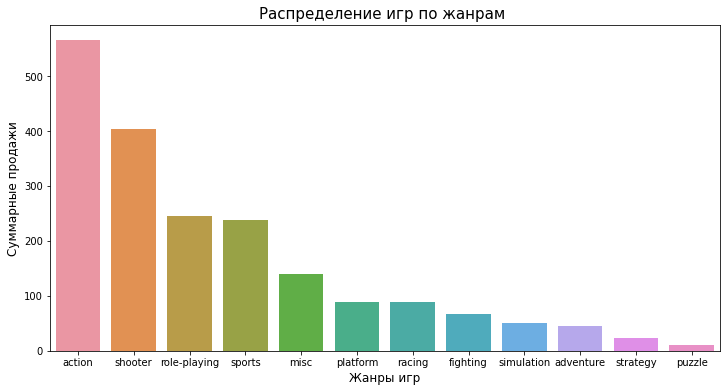

In [56]:
#Суммарные продажи для каждого жанра
genre('genre', 'total_sales', 'sum', 'Суммарные продажи')

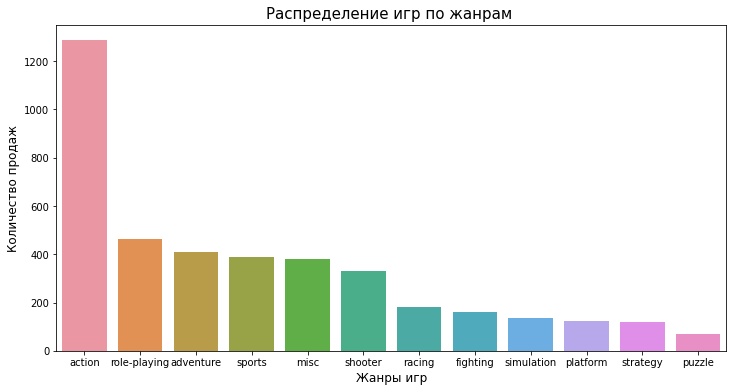

In [57]:
#Количество продаж для каждого жанра
genre('genre', 'total_sales', 'count', 'Количество продаж')

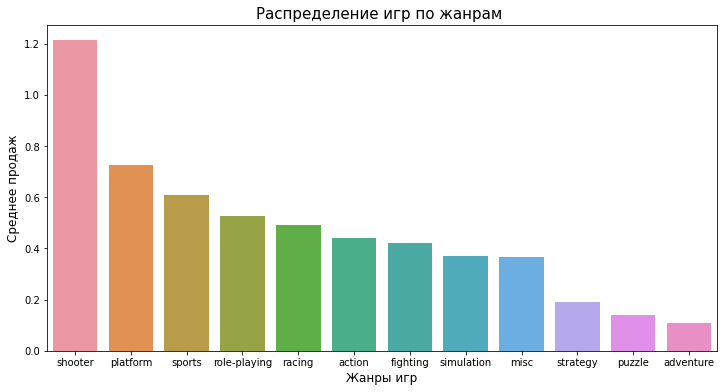

In [58]:
#Средние продажи для каждого жанра
genre('genre', 'total_sales', 'mean', 'Среднее продаж')

In [59]:
genre_tbl = df.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean']).reset_index()
genre_tbl.columns = ['genre', 'sum', 'count', 'mean']
genre_tbl.sort_values(by = 'mean', ascending = False)

,genre,sum,count,mean
8,shooter,402.96,332,1.213735
4,platform,88.68,122,0.726885
10,sports,237.40,390,0.608718
7,role-playing,245.63,465,0.528237
6,racing,88.31,180,0.490611
0,action,565.22,1287,0.439176
2,fighting,66.90,159,0.420755
9,simulation,50.26,136,0.369559
3,misc,139.91,382,0.366257
11,strategy,22.51,118,0.190763


- Больше всего суммарных продаж у жанра action, меньше всего puzzle
- Самое большое количество продаж у жанра action, меньше всего puzzle
- Среднее по продажам больше всего у жанра shooter, меньше всех у adventure

Вывод по исследовательскому анализу данных:
- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Средняя жизнь игровой платформы составляет 8-10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
- Больше всего было продано игр на Sony Playstation и Xbox 360.
- У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
- Больше всего суммарных продаж у жанра action, меньше всего puzzle
- Самое большое количество продаж у жанра action, меньше всего puzzle
- Среднее по продажам больше всего у жанра shooter, меньше всех у adventure

## Портрет пользователя каждого региона

Так как в столбце rating есть пропуски, выделим эти пропуски как отдельную категорию рейтинга

In [60]:
df['rating'] = df['rating'].fillna('TBD')
print(df['rating'].value_counts())
print(df['rating'].isna().sum())

TBD     1717
m        629
t        621
e        620
e10+     463
ec         1
rp         1
Name: rating, dtype: int64
0


Сначала рассмотрим данные за актуальный период, затем за 2016 год

In [61]:
def test(region, title):
    for i in ['platform', 'genre', 'rating']:
        if title in ['Северная Америка', 'Европа', 'Япония']:
            top = df.pivot_table(index=i, values=region, aggfunc = 'sum').sort_values(by=region, ascending = False).reset_index().head(5)
            display(top)
            plt.figure(figsize=(6,3))
            plt.title(title ,fontsize=15)
            sns.barplot(data=top, x=i, y=region)
            plt.xlabel(i,fontsize=12)
            plt.ylabel('Продажи',fontsize=12)
        else: 
            top = df[df['year_of_release']>2015].pivot_table(index=i, values=region, aggfunc = 'sum').sort_values(by=region, ascending = False).reset_index().head(5)
            display(top)
            plt.figure(figsize=(6,3))
            plt.title(title ,fontsize=15)
            sns.barplot(data=top, x=i, y=region)
            plt.xlabel(i,fontsize=12)
            plt.ylabel('Продажи',fontsize=12)

### Портрет пользователя Северной Америки

,platform,na_sales
0,x360,228.18
1,ps3,168.96
2,ps4,108.74
3,xone,93.12
4,3ds,82.83


,genre,na_sales
0,action,234.41
1,shooter,194.45
2,sports,108.70
3,role-playing,83.78
4,misc,69.81


,rating,na_sales
0,m,309.32
1,e,170.25
2,TBD,124.03
3,e10+,119.95
4,t,109.62


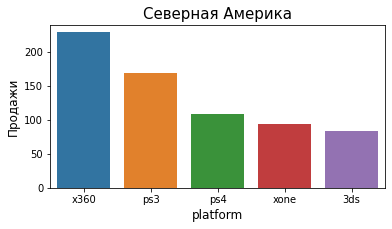

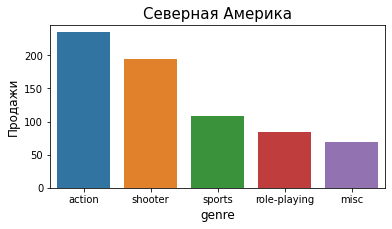

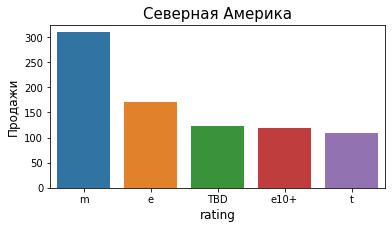

In [62]:
#Отрисуем барплоты и выведем сводные таблицы
test('na_sales', 'Северная Америка')

,platform,na_sales
0,ps4,21.49
1,xone,14.27
2,3ds,4.14
3,wiiu,2.10
4,pc,1.36


,genre,na_sales
0,shooter,16.24
1,action,9.29
2,sports,7.54
3,role-playing,5.89
4,fighting,1.84


,rating,na_sales
0,m,15.67
1,t,8.95
2,TBD,8.53
3,e,7.97
4,e10+,3.81


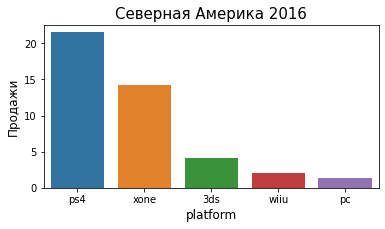

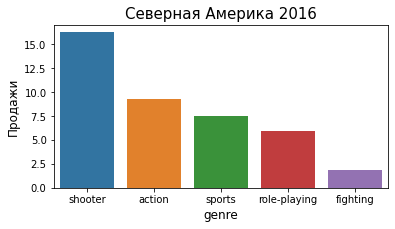

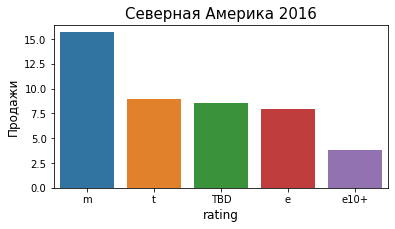

In [63]:
#Отрисуем барплоты и выведем сводные таблицы
test('na_sales', 'Северная Америка 2016')

Вывод:</br>
За актуальный период:</br>
- Самые популярные игровые платформы в Северной Америке за актуальный период это: X360, PS3, PS4, xone, 3DS.
- Топ 5 жанров в Северной Америке за актуальный период: action, shooter, sports, role-playing, misc.
- По рейтингам видно, что больше всего продаж за актуальный период у игр с рейтингом "от 17 и выше", на втором месте игры с рейтингом "для всех" и на третьем месте игры без рейтинга.</br>
За последний год:</br>
- Самые популярные игровые платформы за 2016 в Северной Америке: PS4, xone, 3DS, wiiu, PC. В лидеры вышел PS4, появились PC и wiiu, ушли PS3 и X360
- Топ 5 жанров в Северной Америке за 2016: shooter, action, sports, role-playing, fighting. В лидеры вышли шутеры, появился fighting
- По рейтингам видно, что в лидерах остались игры с рейтингом "от 17 и выше", на втором месте игры с рейтингом "от 13 и вывше" и на третьем месте игры без рейтинга.

### Портрет европейского пользователя

,platform,eu_sales
0,ps3,164.15
1,ps4,141.09
2,x360,117.87
3,3ds,61.46
4,pc,57.38


,genre,eu_sales
0,action,202.17
1,shooter,148.05
2,sports,88.67
3,role-playing,62.30
4,racing,40.58


,rating,eu_sales
0,m,251.40
1,e,141.93
2,TBD,116.67
3,t,83.37
4,e10+,79.88


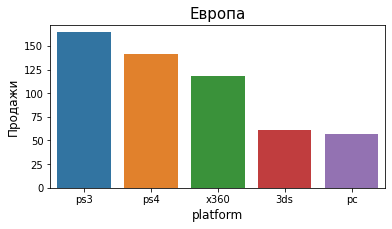

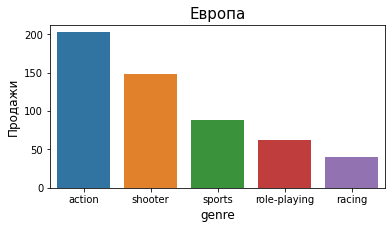

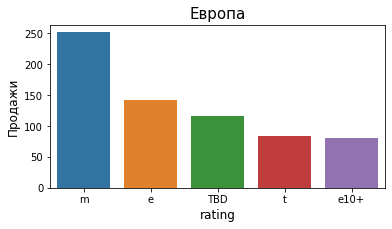

In [64]:
#Отрисуем барплоты и выведем сводные таблицы
test('eu_sales', 'Европа')

,platform,eu_sales
0,ps4,31.78
1,xone,9.63
2,pc,3.53
3,3ds,2.33
4,wiiu,1.48


,genre,eu_sales
0,shooter,15.90
1,sports,12.01
2,action,10.68
3,role-playing,4.28
4,racing,1.77


,rating,eu_sales
0,m,16.54
1,e,13.61
2,t,9.79
3,TBD,7.47
4,e10+,3.81


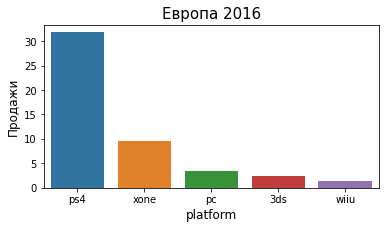

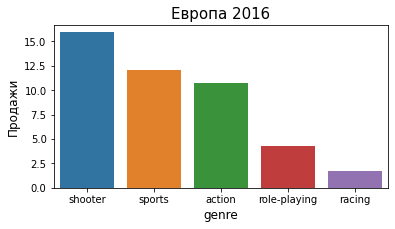

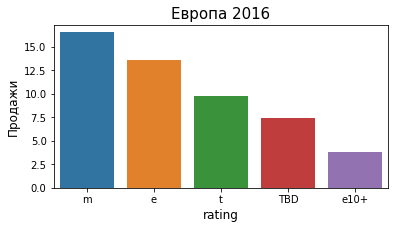

In [65]:
#Отрисуем барплоты и выведем сводные таблицы
test('eu_sales', 'Европа 2016')

Вывод:</br>
За актуальный период:</br>
- Самые популярные игровые платформы в Европе за актуальный период это: PS3, PS4, X360, 3ds, PC.
- Топ 5 жанров в Европе за актуальный период: action, shooter, sports, role-playing, racing.
- По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры без рейтинга.</br>
За последний год:</br>
- Самые популярные игровые платформы в Европе за 2016 это: PS4, xone, pc, 3ds, wiiu. В 2016 году в Европе явный лидер по продажам PS4, из лидеров ушли PS3, X360, появились: xone, wiiu.
- Топ 5 жанров в Европе за 2016: shooter, sports, action, role-playing, racing. В лидеры вышли шутеры, спорт перешёл на второе иместо, а экшн с 1 на 3.
- По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом "от 13 и выше"

### Портрет японского пользователя

,platform,jp_sales
0,3ds,100.62
1,ps3,49.40
2,psp,24.28
3,psv,21.84
4,ps4,15.96


,genre,jp_sales
0,role-playing,79.87
1,action,63.63
2,misc,17.85
3,fighting,12.38
4,platform,12.13


,rating,jp_sales
0,TBD,138.46
1,e,36.68
2,t,33.39
3,m,26.15
4,e10+,11.23


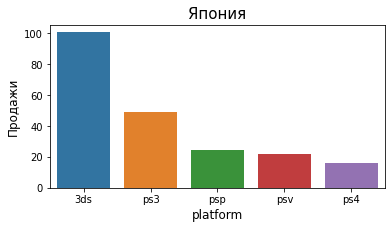

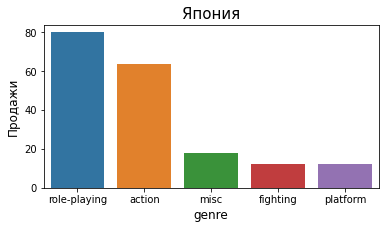

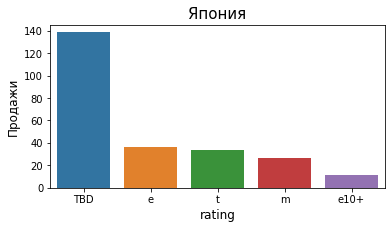

In [66]:
#Отрисуем барплоты и выведем сводные таблицы
test('jp_sales', 'Япония')

,platform,jp_sales
0,3ds,8.03
1,ps4,5.74
2,psv,3.56
3,ps3,1.30
4,wiiu,0.67


,genre,jp_sales
0,action,7.07
1,role-playing,6.61
2,adventure,1.18
3,shooter,1.06
4,misc,1.04


,rating,jp_sales
0,TBD,14.32
1,t,2.27
2,m,1.20
3,e,1.07
4,e10+,0.45


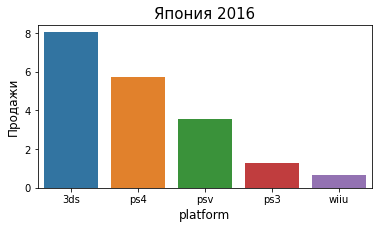

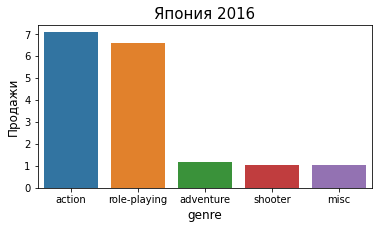

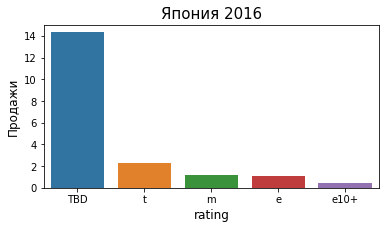

In [67]:
#Отрисуем барплоты и выведем сводные таблицы
test('jp_sales', 'Япония 2016')

Вывод:</br>
За актуальный период: </br>
- Самые популярные игровые платформы в Японии за актуальный период это: 3DS, PS3, PSV, PS4, wiiu.
- Топ 5 жанров в Японии за актуальный период: role-playing, action, misc, fighting, platform.
- По рейтингам видно, что больше всего продаж за актуальный период у игр без рейтинга, на втором месте игры с рейтингом "для всех", и на третьем месте игры с рейтингом "от 13 и выше".</br>
За последний год:</br>
- Самые популярные игровые платформы в Японии за 2016 это: 3DS, PS4, PSP, PSV, PS4.
- Топ жанров в Японии за 2016: role-playing, action, остальные жанры отошли на второй план
- По рейтингам видно, что больше всего продаж за 2016 у игр с без рейтинга, на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

Начнём с формулировки нулевой гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства. H₀ - среднее рассматриваемой выборочной совокупности равно второй. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ - среднее выборочной совокупности не равно второй. H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны. H1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Критический уровень статистической значимости присвоим значением 0.05.

In [68]:
#Возьмём выборки без пропусков в рейтингах
pc = df[df['platform']=='pc']['user_score'].dropna()
xone = df[df['platform']=='xone']['user_score'].dropna()

In [69]:
#Проведём тест Левена
stats.levene(pc, xone, center='mean')

LeveneResult(statistic=7.099518207561405, pvalue=0.00796261217250747)

Выборки имеют разные дисперсии, т.к. pvalue < 0.05

In [70]:
print('cредний рейтинг pc: ', pc.mean())
print('cреднее рейтинг xone: ', xone.mean())
alpha = .05 

results = st.ttest_ind(
    pc, 
    xone,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cредний рейтинг pc:  6.4662423
cреднее рейтинг xone:  6.521428
p-значение: 0.6865957720332341
Не получилось отвергнуть нулевую гипотезу


Можем сказать, что средний рейтинг по двум выборкам по платформам почти не различается. Т.к. гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону рейтинг отличается. Однако посчитав средний рейтинг для двух платформ, с уверенностью можем сказать: средние рейтинги почти не отличаются. P-значение (англ. P-value) — величина, используемая при тестировании статистических гипотез. Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода). То есть вероятность ошибки при отклонении нулевой гипотезы: ~70%. Однако принимать какую-либо гипотезу мы в любом случае не можем, т.к. данные могут лишь не противоречить ей или, наоборот, показывать очень маловероятные результаты.

### Средние пользовательские рейтинги жанров Action и Sports

Начнём с формулировки нулевой гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства. H₀ - среднее рассматриваемой выборки совокупности равно второй. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ - среднее выборки совокупности не равно второй. H0 - Средние пользовательские рейтинги action и sports одинаковы. H1 - Средние пользовательские рейтинги action и sports разные.

Критический уровень статистической значимости присвоим значением 0.05.

In [71]:
action = df[df['genre'] == 'action']
sports = df[df['genre'] == 'sports']

In [72]:
#Возьмём выборки без пропусков
action = action['user_score'].dropna()
sports = sports['user_score'].dropna()

In [73]:
#Проведём тест Левена
stats.levene(action, sports, center='mean')

LeveneResult(statistic=23.100469187794356, pvalue=1.7952940449445963e-06)

Выборки имеют разные дисперсии, т.к. pvalue < 0.05

In [74]:
print('Средний пользовательский рейтинг action: ', action.mean())
print('Средний пользовательский рейтинг sports: ', sports.mean())
alpha = 0.05

results = st.ttest_ind(
    action, 
    sports,
    equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг action:  6.783851
Средний пользовательский рейтинг sports:  5.650813
p-значение: 4.428350254174772e-19
Отвергаем нулевую гипотезу


Можем сказать, что средний рейтинг по двум жанрам отличается. Т.к. гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону рейтинг отличается. Однако посчитав средний рейтинг для двух жанров, с уверенностью можем сказать: средние рейтинги отличаются. P-значение (англ. P-value) — величина, используемая при тестировании статистических гипотез. Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода). То есть вероятность ошибки при отклонении нулевой гипотезы: ~0%. Однако принимать какую-либо гипотезу мы в любом случае не можем, т.к. данные могут лишь не противоречить ей или, наоборот, показывать очень маловероятные результаты.

## Общие выводы

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года.
- С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.
- Самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS
- Самый долгожитель - платформа ds
- Практически все игровые платформы в среднем существуют по 10 лет.
- Cамые продаваемые это Sony Play Station и XBOX
- Самый пик наступает примерно через 5 лет после выхода приставки
- Количество продаж по всем платформам падает к 2016 году.</br>
За актуальный период: </br>
- Больше всех продаж у xone, затем wiiu, после PS4, 3DS, PC и PSV на последнем месте.
- Успех xone можно попробовать объяснить тем, что она вышла недавно, самая молодая платформа.
- У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
- Больше всего суммарных продаж у жанра action, меньше всего puzzle
- Самое большое количество продаж у жанра action, меньше всего puzzle
- Среднее по продажам больше всего у жанра shooter, меньше всех у adventure
- Средние рейтинги платформ Xbox ONE и PC почти равны
- Средние рейтинги жанров Sports и Action разные</br>
Портреты пользователей: </br>
Северная Америка:</br>
- Самые популярные игровые платформы за 2016 в Северной Америке: PS4, xone, 3DS, wiiu, PC. В лидеры вышел PS4, появились PC и wiiu, ушли PS3 и X360
- Топ 5 жанров в Северной Америке за 2016: shooter, action, sports, role-playing, fighting. В лидеры вышли шутеры, появился fighting
- По рейтингам видно, что в лидерах остались игры с рейтингом "от 17 и выше", на втором месте игры с рейтингом "от 13 и вывше" и на третьем месте игры с рейтингом "для всех".</br>
Европа:</br>
- По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом "от 13 и выше".
- Самые популярные игровые платформы в Европе за 2016 это: PS4, xone, pc, 3ds, wiiu. В 2016 году в Европе явный лидер по продажам PS4, из лидеров ушли PS3, X360, появились: xone, wiiu.
- Топ 5 жанров в Европе за 2016: shooter, sports, action, role-playing, racing. В лидеры вышли шутеры, спорт перешёл на второе иместо, а экшн с 1 на 3.</br>
Япония:</br>
- Самые популярные игровые платформы в Японии за актуальный период это: 3DS, PS3, PSV, PS4, wiiu.
- Топ 5 жанров в Японии за актуальный период: role-playing, action, misc, fighting, platform.
- По рейтингам видно, что больше всего продаж за актуальный период у игр без рейтинга, на втором месте игры с рейтингом "для всех", и на третьем месте игры с рейтингом "от 13 и выше".</br>
За последний год:</br>
- Самые популярные игровые платформы в Японии за 2016 это: 3DS, PS4, PSP, PSV, PS4.
- Топ жанров в Японии за 2016: role-playing, action, остальные жанры отошли на второй план
- По рейтингам видно, что больше всего продаж за 2016 у игр с рейтингом "от 13 и выше", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "для всех".

Рекомендации бизнесу: продавать игры на PS4 в жанре shooter, игры с рейтингом от 17 лет для Европы и Северной Америки. Для Японии продавать игры на 3DS, PS4 в жанре role-playing, action, без рейтинга.